<a href="https://colab.research.google.com/github/vinayak2019/python_quantum_chemistry_introductory/blob/main/Input_structure_for_QC_calculations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup
Please run cell below to install the required pacakages

In [ ]:
! pip install rdkit
! pip install pyscf

# Creating structures from SMILES

Molecules can be represented as strings with SMILES. Simplified molecular-input line-entry system (SMILES) is a string based representation of a molecule. (https://en.wikipedia.org/wiki/Simplified_molecular-input_line-entry_system) For example n-butane is represented as CCCC. Interactive RDKit demo for SMILES is available at https://rdkit.org/temp/demo/demo.html

If you want to draw a 2D structure of molecule and obtain the SMILES representation, use this link https://pubchem.ncbi.nlm.nih.gov//edit3/index.html

In [2]:
# import these definitions
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = True

Let us see how to visualize the 2D structure of toluene using SMILES 

In [ ]:
# set SMILES for toluene
smiles = "c1ccc(C)cc1"

# Convert to RDKit molecule 
mol = Chem.MolFromSmiles(smiles)

# Draw the strucutre
Draw.MolsToGridImage([mol])

The structure generated has implicit hydrogen atoms. We will need explicit hydrogen atoms to generate the input structure

In [ ]:
# Add hydrogens
mol_h = Chem.AddHs(mol)

# Display both structures
Draw.MolsToGridImage([mol, mol_h], subImgSize=(300,300))

The input to a quantum chemistry calculation is a 3D structure. Adding x,y,z coordinates to each atom generates a conformer. The section below generates one confomer. 

In [ ]:
# The current molecule has z = 0 for all atoms
# This is a 2D molecule
print(Chem.MolToMolBlock(mol_h))

In [ ]:
# Let us make it 3D by generating a random conformer
Chem.AllChem.EmbedMolecule(mol_h)

# look at the molecule again
print(Chem.MolToMolBlock(mol_h))

In [7]:
# Save the molecule in XYZ format for future use
Chem.MolToXYZFile(mol_h,"toluene.xyz")

Conformer generation is an active area of research. 

1.   https://www.rdkit.org/UGM/2012/Ebejer_20110926_RDKit_1stUGM.pdf
2.   https://pubs.acs.org/doi/10.1021/acs.jcim.0c00025

## Exercise

Create a 3D structure for aspirin and save the coordinated in **aspirin.xyz**

In [ ]:
# YOUR CODE HERE

# Manipulating the 3D structure

As we saw earlier the 3D conformer is randonly generated. But we want to modify the structure before starting any quantum chemistry calculations. Wrong structures or incorrect geometries lead to bad estimates. 

For demonstration we will use biphenyl and change the angle between two benzene rings.

To enable numbering of atoms, set the draw options

In [ ]:
# create the 3D structure of toluene 
smiles = "C1=CC=C(C=C1)C2=CC=CC=C2"
mol = Chem.MolFromSmiles(smiles)
mol = Chem.AddHs(mol)
Chem.AllChem.EmbedMolecule(mol)
Chem.MolToXYZFile(mol, "initial.xyz")
mol

To change the dihedral angle, we need to set the value. The dihedral angle is the angle between the two planes of benzene. We need four atoms to describe the dihedral.

The syntax is

Chem.AllChem.SetDihedralDeg(*conformer*,a1,a2,a3,a4,*value*)  

In [ ]:
# set the value to 90 for the conformer
Chem.AllChem.SetDihedralDeg(mol.GetConformer(0),4,3,6,11,90.0)

# save the new conformer
Chem.MolToXYZFile(mol, "90.xyz")

# Looks like it is set to 90
mol

## Exercise

Generate the 3D structure of cis-butene and trans butene. 

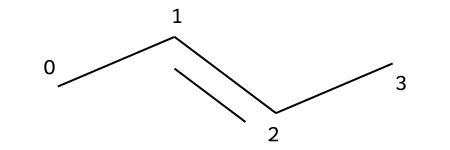

In [10]:
smiles = "CC=CC"
mol = Chem.MolFromSmiles(smiles)
mol

In [ ]:
# YOUR CODE HERE

# Combinatorial genration

To study the effect of functional group substitution, we need to create a library of molcules replaing the functional group. We can do that with combinatorial method. We will consider benzene core and some functional groups 

In [ ]:
# generate the core molcule
core = Chem.MolFromSmiles('*c1ccccc1')
core

In [ ]:
# For simplicity let's use one functional group
functional_group = "F"
functional_mol = Chem.MolFromSmiles(functional_group)
functional_mol

In [ ]:
# generate the combined molecule
product = Chem.ReplaceSubstructs(core,Chem.MolFromSmarts('[#0]'),functional_mol)
new_smiles = Chem.MolToSmiles(product[0])
new_mol = Chem.MolFromSmiles(new_smiles)

# Draw the new molecule
Draw.MolsToGridImage([new_mol])

Now do it for multiple functional groups

In [ ]:
# create a list of functional groups
functional_groups = ['F','Cl','C','c1ccccc1Cl']
functional_mols = [Chem.MolFromSmiles(group) for group in functional_groups]

# Draw the groups
Draw.MolsToGridImage(functional_mols)

In [ ]:
product_smi = []
for functional_mol in functional_mols:
    product_mol = Chem.ReplaceSubstructs(core,Chem.MolFromSmarts('[#0]'),functional_mol)
    product_smi.append(Chem.MolToSmiles(product_mol[0]))
Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi in product_smi])


# Running DFT calculation

We will use PySCF which is open-source software for running quantum chemistry calculations. You can find more details here - https://pyscf.org/

More tutorials and example files for PySCF are available at https://github.com/pyscf/pyscf/tree/master/examples

In [16]:
# import the package
from pyscf import gto, scf

We need a 3D structure input to PSI4. Then we set other parameters - DFT functional, basis set, charge. Details about the parametrs will be discussed in the next session.

In [42]:
# reading the xyz into PSI4 - first open the file the pass it to PSI4
mol = gto.M(atom="toluene.xyz")

In [44]:
# set basis set
mol.basis = "3-21G"

# set the functional
mf = mol.KS()
mf.xc = 'b3lyp'

In [ ]:
# run calculation to get total energy
mf.kernel()

# Exercise

Compute the SCF energy for cis-butene and trans-butene. Determine which is more stable (more negative value of SCF energy)

In [ ]:
# YOUR CODE HERE

Please complete this survey to help me improve the quality of future workshops

https://docs.google.com/forms/d/e/1FAIpQLSdpn3lpq1n1fA4aqLDvfA9VARsTNBnD5p6gcCtJ_VaYGiYxlA/viewform?usp=sf_link